In [414]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [415]:
data = pd.read_csv('fraudTrain.csv')  # Read
#pd.set_option('display.float_format', lambda x:'%f'%x)  # Format


In [416]:
#print('Number of Records: {}'.format(len(data)))
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
data.head()

Dataset rows: 1296675 columns: 23


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [417]:
# Check dataset for missing or NaN values
print('Dataset rows: {} columns: {}'.format(data.shape[0], data.shape[1]))
missing_values_count = data.isna().sum()
print(missing_values_count)

Dataset rows: 1296675 columns: 23
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [418]:
# View the unnamed column, then get and rename
print(data.iloc[:,0])
data = data.rename(columns={data.columns[0]: "column_id"})
data.set_index('column_id', inplace=True)
data.head()

0                0
1                1
2                2
3                3
4                4
            ...   
1296670    1296670
1296671    1296671
1296672    1296672
1296673    1296673
1296674    1296674
Name: Unnamed: 0, Length: 1296675, dtype: int64


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [419]:
# Convert to numeric
data['amt'] = pd.to_numeric(data['amt'], errors='coerce')
data['zip'] = pd.to_numeric(data['zip'], errors='coerce')
data['lat'] = pd.to_numeric(data['lat'], errors='coerce')
data['long'] = pd.to_numeric(data['long'], errors='coerce')
data['city_pop'] = pd.to_numeric(data['city_pop'], errors='coerce')
data['merch_lat'] = pd.to_numeric(data['merch_long'], errors='coerce')
data['is_fraud'] = pd.to_numeric(data['is_fraud'], errors='coerce')
# Processing date of birth
data['dob'] = pd.to_datetime(data['dob'])  # convert to datetime object
data['year_of_birth'] = data['dob'].dt.year  # extract year
data['month_of_birth'] = data['dob'].dt.month  # extract month
data['day_of_birth'] = data['dob'].dt.day  # extract day
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,-82.048315,-82.048315,0,1988,3,9
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,-118.186462,-118.186462,0,1978,6,21
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,-112.154481,-112.154481,0,1962,1,19
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,-112.561071,-112.561071,0,1967,1,12
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,-78.632459,-78.632459,0,1986,3,28


In [420]:
# Processing transaction date and time
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])  # convert to datetime object
data['year_of_trans'] = data['trans_date_trans_time'].dt.year  # extract year
data['month_of_trans'] = data['trans_date_trans_time'].dt.month  # extract month
data['day_of_trans'] = data['trans_date_trans_time'].dt.day  # extract day
data['time_of_trans'] = data['trans_date_trans_time'].dt.time  # extract time
data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans
column_id,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,-82.048315,0,1988,3,9,2019,1,1,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,-118.186462,0,1978,6,21,2019,1,1,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,-112.154481,0,1962,1,19,2019,1,1,00:00:51
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,-112.561071,0,1967,1,12,2019,1,1,00:01:16
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,-78.632459,0,1986,3,28,2019,1,1,00:03:06


In [421]:

# Create a sub-set
sub1 = data[data['is_fraud'] == 1]
print('Subset rows: {} columns: {}'.format(sub1.shape[0], sub1.shape[1]))
sub1.head()

Subset rows: 7506 columns: 29


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans
column_id,,,,,,,,,,,,,,,,,,,,,
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-81.179483,-81.179483,1,1988,9,15,2019,1,2,01:06:37
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-99.142791,-99.142791,1,1960,10,28,2019,1,2,01:47:29
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.836360,-98.836360,1,1960,10,28,2019,1,2,03:05:23
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-82.091010,-82.091010,1,1988,9,15,2019,1,2,03:38:03
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.683410,-98.683410,1,1960,10,28,2019,1,2,03:55:47


In [422]:
# Check how many cases are fraud
is_fraud_count = sub1[(sub1['is_fraud'] == 1)]
print('Fraud count: {}'.format(len(is_fraud_count)))
is_fraud_count.head()

Fraud count: 7506


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans
column_id,,,,,,,,,,,,,,,,,,,,,
2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-81.179483,-81.179483,1,1988,9,15,2019,1,2,01:06:37
2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-99.142791,-99.142791,1,1960,10,28,2019,1,2,01:47:29
2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.836360,-98.836360,1,1960,10,28,2019,1,2,03:05:23
2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,Collettsville,...,-82.091010,-82.091010,1,1988,9,15,2019,1,2,03:38:03
2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,San Antonio,...,-98.683410,-98.683410,1,1960,10,28,2019,1,2,03:55:47


In [423]:
#  performs both undersampling and oversampling techniques to balance the classes in the dataset
from sklearn.utils import resample

# Separate fraud and non-fraud cases
fraud_cases = data[data['is_fraud'] == 1]
non_fraud_cases = data[data['is_fraud'] == 0]

# Undersample the majority class (non-fraud cases)
num_fraud_cases = len(fraud_cases)
undersampled_non_fraud_cases = resample(non_fraud_cases,
                                       replace=False,
                                       n_samples=num_fraud_cases,
                                       random_state=42)

# Oversample the minority class (fraud cases)
oversampled_fraud_cases = resample(fraud_cases,
                                   replace=True,
                                   n_samples=num_fraud_cases,
                                   random_state=42)

# Combine the undersampled non-fraud cases with the fraud cases
sub3 = pd.concat([undersampled_non_fraud_cases, oversampled_fraud_cases])

# Shuffle the subset to ensure randomization
sub3 = sub3.sample(frac=1, random_state=42)

In [424]:
sub3['amt'] = pd.qcut(data['amt'], 3, labels=[0, 1, 2])

In [425]:
current_year = 2023
sub3['age_bracket'] = pd.cut(data['year_of_birth'], bins=[1940, 1954, 1969, current_year], labels=[0, 1, 2], right=False)



In [426]:
sub3['city_pop'] = pd.qcut(data['city_pop'], 6, labels=[0, 1, 2, 3, 4, 5])

In [427]:
sub3['merch_lat'] = pd.cut(sub3['merch_lat'], bins=10, labels=False)
sub3['merch_long'] = pd.cut(sub3['merch_long'], bins=10, labels=False)


In [428]:
sub3.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,year_of_birth,month_of_birth,day_of_birth,year_of_trans,month_of_trans,day_of_trans,time_of_trans,age_bracket
column_id,,,,,,,,,,,,,,,,,,,,,
1173129,2020-05-04 18:52:50,375848982312810,"fraud_Ledner, Hartmann and Feest",health_fitness,0,Dale,Smith,M,25036 Contreras Turnpike Suite 270,Purmela,...,6,0,1943,12,15,2020,5,4,18:52:50,0
314369,2019-06-01 03:52:32,4777065439639721,fraud_Zemlak Group,misc_net,2,Peter,Caldwell,M,08966 Beltran Route Suite 905,Oaks,...,9,0,1987,4,24,2019,6,1,03:52:32,2
1184326,2020-05-10 03:19:16,676326610042,fraud_Beier-Hyatt,shopping_pos,2,Jacqueline,Caldwell,F,54220 April Union Suite 403,Riverview,...,8,1,1993,11,2,2020,5,10,03:19:16,2
713505,2019-11-01 02:18:39,4990494243023,"fraud_Lind, Huel and McClure",gas_transport,0,Martin,Ford,M,56812 Francis Courts,Corriganville,...,8,1,1960,12,13,2019,11,1,02:18:39,1
1073580,2020-03-22 08:38:19,377264520876399,fraud_Turner and Sons,shopping_pos,0,Kara,Miles,F,2076 Thomas Roads Suite 970,Cassatt,...,8,0,1961,7,31,2020,3,22,08:38:19,1


In [429]:
sub3.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'year_of_birth', 'month_of_birth',
       'day_of_birth', 'year_of_trans', 'month_of_trans', 'day_of_trans',
       'time_of_trans', 'age_bracket'],
      dtype='object')

In [430]:
# # Split into features (X) and target variable (y)
# X = sub3[[ 'amt', 'year_of_birth', 'city_pop']]
# y = sub3['is_fraud']
#
# # 80/20 training to test data split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Model training
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
#
# # Predictions
# y_pred = clf.predict(X_test)
#
# # Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
#
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

In [431]:
# # Categorize 'merch_lat' and 'merch_long' into bins
# X = sub3[['merch_long', 'merch_lat']]
# y = sub3['is_fraud']
#
# # 80/20 training to test data split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
# # Model training
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
#
# # Predictions
# y_pred = clf.predict(X_test)
#
# # Evaluation
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
#
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


In [432]:
# Split into features (X) and target variable (y)
X = sub3[[ 'amt', 'year_of_birth']]
y = sub3['is_fraud']

# 80/20 training to test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.726939726939727
Precision: 0.7069795427196149
Recall: 0.7791777188328912
F1 Score: 0.7413249211356465


In [433]:
from sklearn.tree import export_text

feature_names = X.columns.tolist()

tree_rules = export_text(clf, feature_names=feature_names)

print(tree_rules)

|--- amt <= 1.50
|   |--- amt <= 0.50
|   |   |--- year_of_birth <= 1988.50
|   |   |   |--- year_of_birth <= 1941.50
|   |   |   |   |--- year_of_birth <= 1925.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- year_of_birth >  1925.50
|   |   |   |   |   |--- year_of_birth <= 1928.50
|   |   |   |   |   |   |--- year_of_birth <= 1926.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- year_of_birth >  1926.50
|   |   |   |   |   |   |   |--- year_of_birth <= 1927.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- year_of_birth >  1927.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- year_of_birth >  1928.50
|   |   |   |   |   |   |--- year_of_birth <= 1934.50
|   |   |   |   |   |   |   |--- year_of_birth <= 1933.50
|   |   |   |   |   |   |   |   |--- year_of_birth <= 1931.50
|   |   |   |   |   |   |   |   |   |--- year_of_birth <= 1929.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   

Accuracy of Decision Tree classifier on training set: 0.72
Accuracy of Decision Tree classifier on test set: 0.73


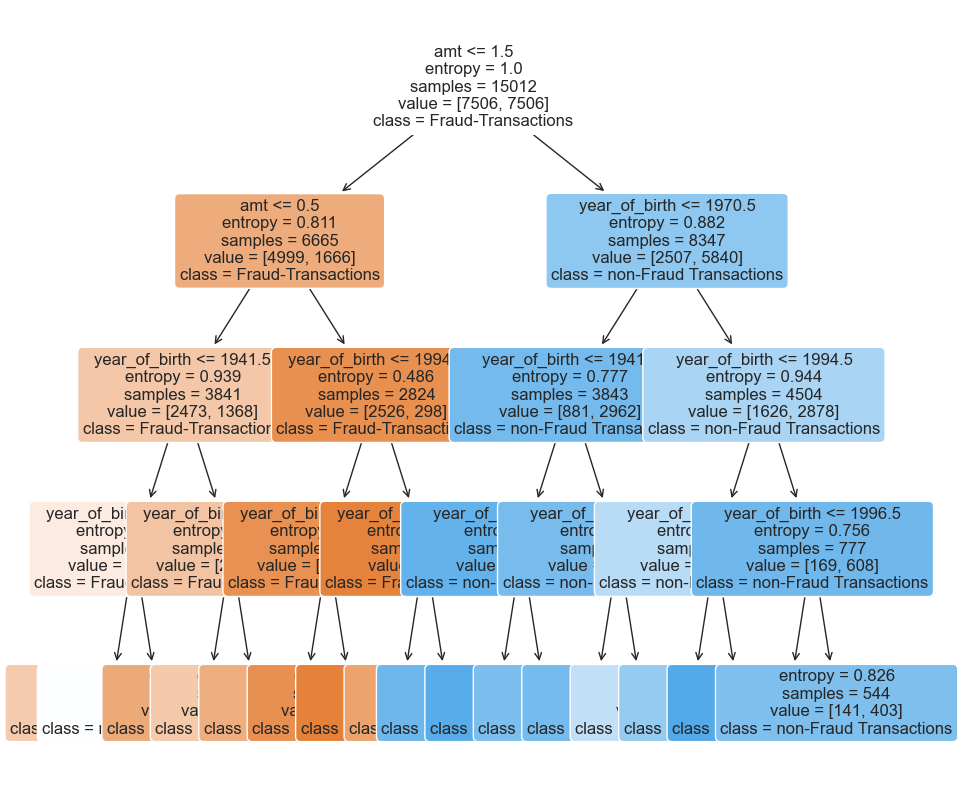

In [434]:
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf = clf.fit(X, y)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
.format(clf.score(X_test, y_test)))

plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=feature_names, class_names=['Fraud-Transactions', 'non-Fraud Transactions'],  filled=True, rounded=True, fontsize=12)
plt.show()

test_pred_decision_tree = clf.predict(X_test)

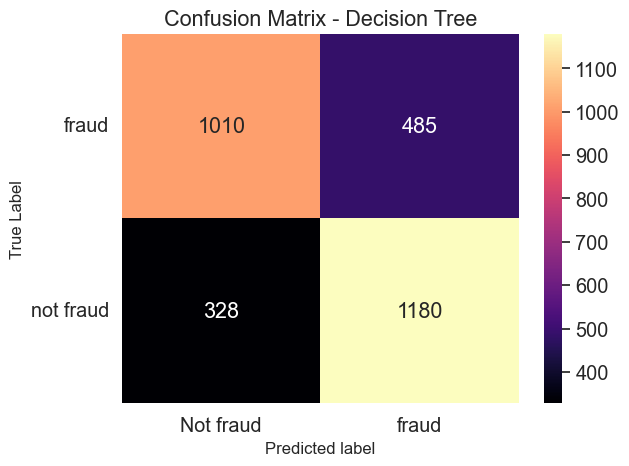

<Figure size 1000x800 with 0 Axes>

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


# Get the predicted labels from the decision tree classifier
y_pred_decision_tree = clf.predict(X_test)

# Get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_decision_tree)

# Create a DataFrame from the confusion matrix
matrix_df = pd.DataFrame(confusion_matrix)

# Plot the confusion matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")

# Set axis titles and labels
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize=12)
ax.set_xticklabels(['Not fraud', 'fraud'])
ax.set_ylabel("True Label", fontsize=12)
ax.set_yticklabels(['fraud', 'not fraud'], rotation=0)

plt.show()

In [436]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
.format(gnb.score(X_test, y_test)))
test_pred_gnb = gnb.predict(X_test)

Accuracy of GNB classifier on training set: 0.71
Accuracy of GNB classifier on test set: 0.71


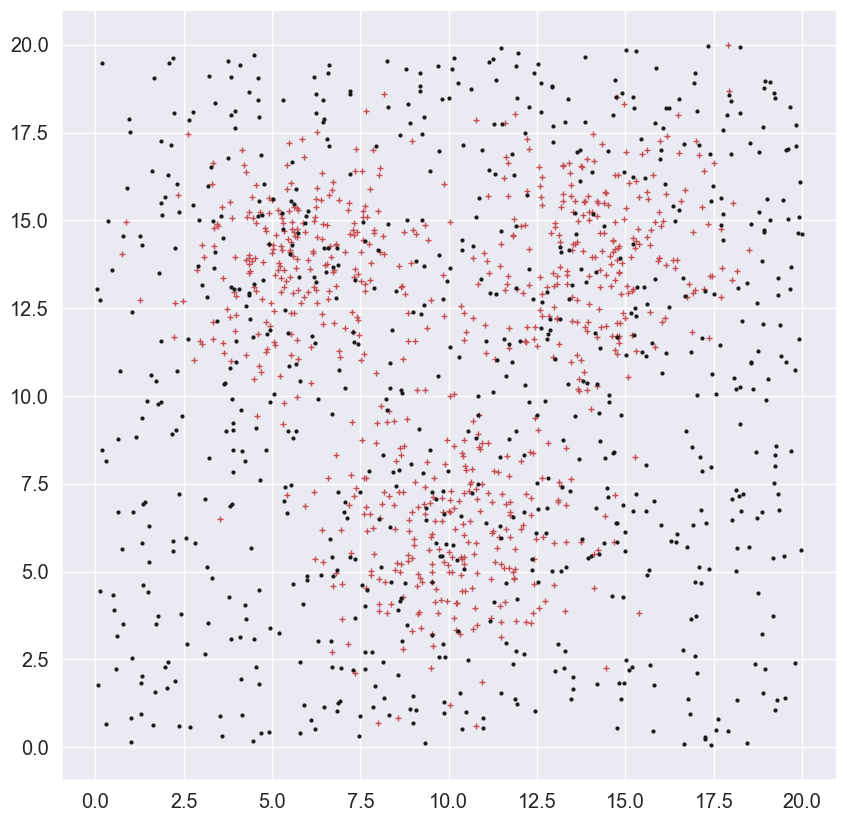

In [437]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random
%matplotlib inline
N = 1500
mean1 = [6, 14]
mean2 = [10, 6]
mean3 = [14, 14]
cov = [[3.5, 0], [0, 3.5]] # diagonal covariance
np.random.seed(50)
X = np.random.multivariate_normal(mean1, cov, int(N/6))
X = np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))
X = np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))
X = np.concatenate((X, 20*np.random.rand(int(N/2),2)))
Y = np.concatenate((np.ones(int(N/2)),np.zeros(int(N/2))))
plt.figure(figsize=(10,10))
plt.plot(X[:int(N/2),0],X[:int(N/2),1],'r+',X[int(N/2):,0],X[int(N/2):,1],'k.',ms=4)

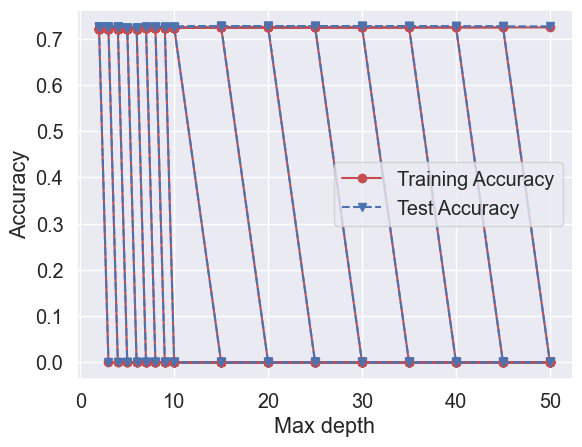

In [438]:
from sklearn.metrics import accuracy_score
#########################################
# Model fitting and evaluation
#########################################
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    #########################################
    # Plot of training and test accuracies
    #########################################
    plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')

In [439]:
#Import svm model
from sklearn import svm
#split the dataset
from sklearn.model_selection import train_test_split
X_train, test_x, y_train, test_lab = train_test_split(X,Y,
test_size = 0.3,
random_state = 42)
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test
y_pred = clf.predict(test_x)

In [440]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(test_lab, y_pred))

print("Precision:",metrics.precision_score(test_lab, y_pred))

print("Recall:",metrics.recall_score(test_lab, y_pred))

Accuracy: 0.5555555555555556
Precision: 0.5340909090909091
Recall: 0.6467889908256881
